# World Happiness Analysis ☃️

## Context
The happiness scores and rankings are based on answers to the main life evaluation question asked in the poll. This question asks respondents to think of a ladder with the *best possible life for them being a 10* and the *worst possible life being a 0* and to rate their own current lives on that scale.

The columns following the happiness score estimate the extent to which each of **six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity** – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

## Problem Statement
Knowing from the sample dataset (2016) listing the happiness scores of representatives in each country and the factors that contribute to these scores, how accurate can we predict the happiness scores of each country in 2017?

In [59]:
# Importing libraries for data analysis
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import sqrt

# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# Importing the dataset
# 2016
dataset2016 = pd.read_csv('dataset/2016.csv')
X_2016 = dataset2016.iloc[:, :-1].values
y_2016 = dataset2016.iloc[:, 8].values

In [61]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_2016[:, 0] = labelencoder.fit_transform(X_2016[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X_2016 = onehotencoder.fit_transform(X_2016).toarray()

# Avoiding the Dummy Variable Trap
X_2016 = X_2016[:, 1:]

In [62]:
# Splitting the dataset into the Training set and Test set
X_2016_train, X_2016_test, y_2016_train, y_2016_test = train_test_split(X_2016, y_2016, test_size = 0.2, random_state = 0)

We will make use of **4 different methods** to create regression models, to find out the most accurate model to act as the final model for the prediction of happiness score for the year 2017.

The most accurate model will have the lowest RMSE (root mean squared error) value.

## Regression Models
- Multiple Linear Regression
- Decision Tree
- Random Forest Regression
- Artificial Neural Network

## Multiple Linear Regression

In [63]:
# MODEL 1: Making use of Multiple Linear Regression
# -------------------------------------------------

# Building the optimal model using Automatic Backward Elimination
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y_2016, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

numArray = []
for i in range(0, 161):
    numArray.append(i)

SL = 0.05
X_opt = X_2016[:, numArray]
X_Modeled = backwardElimination(X_opt, SL)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
ml_regressor = LinearRegression()
ml_regressor.fit(X_opt, y_2016)

# Predicting the Test set results
y_2016_pred_mlr = ml_regressor.predict(X_2016_test)

/Users/ning/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/ning/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/ning/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/ning/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid


**Multiple Linear Regression**: Compute the root mean squared error (% accuracy) between the predicted value and the actual value.

MLR RMSE:  8.627447100765017e-16


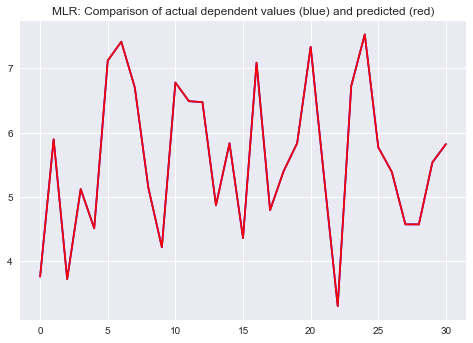

In [64]:
# MODEL 1: Making use of Multiple Linear Regression (RMSE)
# --------------------------------------------------------

rms = sqrt(mean_squared_error(y_2016_test, y_2016_pred_mlr))
print ("MLR RMSE: ", rms)

plt.plot(y_2016_test, color='blue')
plt.plot(y_2016_pred_mlr, color='red')
plt.title('MLR: Comparison of actual dependent values (blue) and predicted (red)')
plt.show()

## Decision Tree Regression

In [65]:
# MODEL 2: Making use of Decision Trees Regression
# ------------------------------------------------

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_2016_train, y_2016_train)

# Making the predictions
y_2016_pred_dtr = dt_regressor.predict(X_2016_test)

**Decision Tree**: Compute the root mean squared error (accuracy) between the predicted value and the actual value.

DTR RMSE:  0.4315688559423105


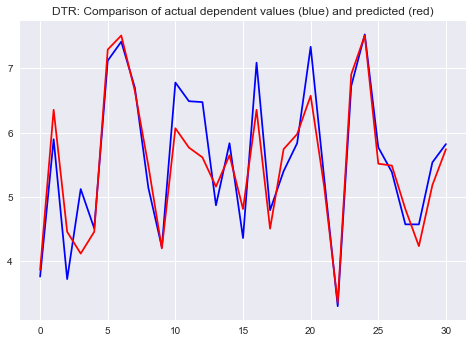

In [23]:
# MODEL 2: Making use of Decision Trees (RMSE)
# --------------------------------------------

rms = sqrt(mean_squared_error(y_2016_test, y_2016_pred_dtr))
print ("DTR RMSE: ", rms)

plt.plot(y_2016_test, color='blue')
plt.plot(y_2016_pred_dtr, color='red')
plt.title('DTR: Comparison of actual dependent values (blue) and predicted (red)')
plt.show()

## Random Forest Regression

In [24]:
# MODEL 3: Making use of Random Forest Regression
# -----------------------------------------------

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_2016_test, y_2016_test)

# Making the predictions
y_2016_pred_rfr = rf_regressor.predict(X_2016_test)

/Users/ning/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**Random Forest Regression**: Compute the root mean squared error (accuracy) between the predicted value and the actual value.

RFR RMSE:  0.2047433531159466


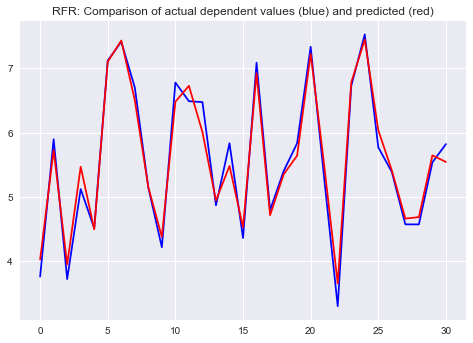

In [25]:
# MODEL 3: Making use of Random Forest Regression (RMSE)
# ------------------------------------------------------

rms = sqrt(mean_squared_error(y_2016_test, y_2016_pred_rfr))
print ("RFR RMSE: ", rms)

plt.plot(y_2016_test, color='blue')
plt.plot(y_2016_pred_rfr, color='red')
plt.title('RFR: Comparison of actual dependent values (blue) and predicted (red)')
plt.show()

## Artificial Neural Network

In [56]:
# MODEL 4: Making use of Artificial Neural Network
# ------------------------------------------------

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
ann_regressor = Sequential()

# Adding the input layer and the first hidden layer
ann_regressor.add(Dense(81, kernel_initializer = 'uniform', activation = 'relu', input_dim = 161))

# Adding the second hidden layer
ann_regressor.add(Dense(81, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
ann_regressor.add(Dense(1, kernel_initializer = 'uniform', activation = 'linear'))

# Compiling the ANN
ann_regressor.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
ann_regressor.fit(X_2016_train, y_2016_train, batch_size = 10, epochs = 500)

# Making the predictions and evaluating the model
# Check model overfitting/underfitting
# Predicting the Train set results
y_2016_pred_ann_train = ann_regressor.predict(X_2016_train)

# Check Training RMSE
rms_train = sqrt(mean_squared_error(y_2016_train, y_2016_pred_ann_train))
print("RMSE Train: ", rms_train)

# Predicting the Test set results
y_2016_pred_ann = ann_regressor.predict(X_2016_test)

# Check Testing RMSE
rms_test = sqrt(mean_squared_error(y_2016_test, y_2016_pred_ann))
print("RMSE Test: ", rms_test)

# Conclude: Training RMSE < Testing RMSE, model may be underfitting!!!

Epoch 1/500
124/124 [==============================] - 1s 7ms/step - loss: 20.8308 - acc: 0.0000e+00
Epoch 2/500
124/124 [==============================] - 0s 432us/step - loss: 11.6414 - acc: 0.0000e+00
Epoch 3/500
124/124 [==============================] - 0s 522us/step - loss: 5.7528 - acc: 0.0000e+00
Epoch 4/500
124/124 [==============================] - 0s 293us/step - loss: -4.0469 - acc: 0.0000e+00
Epoch 5/500
124/124 [==============================] - 0s 272us/step - loss: -63.5063 - acc: 0.0000e+00
Epoch 6/500
124/124 [==============================] - 0s 247us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 7/500
124/124 [==============================] - 0s 250us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 8/500
124/124 [==============================] - 0s 364us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 9/500
124/124 [==============================] - 0s 368us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 10/500
124/124 [==============================] - 0s 408us/step -

124/124 [==============================] - 0s 297us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 79/500
124/124 [==============================] - 0s 369us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 80/500
124/124 [==============================] - 0s 379us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 81/500
124/124 [==============================] - 0s 304us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 82/500
124/124 [==============================] - 0s 303us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 83/500
124/124 [==============================] - 0s 319us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 84/500
124/124 [==============================] - 0s 309us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 85/500
124/124 [==============================] - 0s 290us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 86/500
124/124 [==============================] - 0s 293us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 87/500
124/124 [==============================] - 0s 325us/ste

124/124 [==============================] - 0s 383us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 156/500
124/124 [==============================] - 0s 448us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 157/500
124/124 [==============================] - 0s 402us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 158/500
124/124 [==============================] - 0s 434us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 159/500
124/124 [==============================] - 0s 556us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 160/500
124/124 [==============================] - 0s 414us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 161/500
124/124 [==============================] - 0s 449us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 162/500
124/124 [==============================] - 0s 403us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 163/500
124/124 [==============================] - 0s 342us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 164/500
124/124 [==============================] - 0s 

124/124 [==============================] - 0s 328us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 233/500
124/124 [==============================] - 0s 358us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 234/500
124/124 [==============================] - 0s 259us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 235/500
124/124 [==============================] - 0s 258us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 236/500
124/124 [==============================] - 0s 298us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 237/500
124/124 [==============================] - 0s 261us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 238/500
124/124 [==============================] - 0s 262us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 239/500
124/124 [==============================] - 0s 254us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 240/500
124/124 [==============================] - 0s 269us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 241/500
124/124 [==============================] - 0s 

124/124 [==============================] - 0s 270us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 309/500
124/124 [==============================] - 0s 254us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 310/500
124/124 [==============================] - 0s 282us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 311/500
124/124 [==============================] - 0s 250us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 312/500
124/124 [==============================] - 0s 268us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 313/500
124/124 [==============================] - 0s 279us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 314/500
124/124 [==============================] - 0s 408us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 315/500
124/124 [==============================] - 0s 400us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 316/500
124/124 [==============================] - 0s 427us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 317/500
124/124 [==============================] - 0s 

124/124 [==============================] - 0s 312us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 385/500
124/124 [==============================] - 0s 322us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 386/500
124/124 [==============================] - 0s 326us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 387/500
124/124 [==============================] - 0s 330us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 388/500
124/124 [==============================] - 0s 379us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 389/500
124/124 [==============================] - 0s 374us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 390/500
124/124 [==============================] - 0s 366us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 391/500
124/124 [==============================] - 0s 423us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 392/500
124/124 [==============================] - 0s 436us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 393/500
124/124 [==============================] - 0s 

124/124 [==============================] - 0s 405us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 462/500
124/124 [==============================] - 0s 378us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 463/500
124/124 [==============================] - 0s 371us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 464/500
124/124 [==============================] - 0s 358us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 465/500
124/124 [==============================] - 0s 325us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 466/500
124/124 [==============================] - 0s 390us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 467/500
124/124 [==============================] - 0s 381us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 468/500
124/124 [==============================] - 0s 385us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 469/500
124/124 [==============================] - 0s 417us/step - loss: -68.9490 - acc: 0.0000e+00
Epoch 470/500
124/124 [==============================] - 0s 

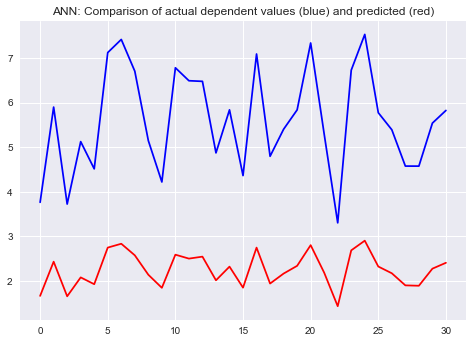

In [58]:
# MODEL 4: Making use of Artificial Neural Network (RMSE)
# -------------------------------------------------------

plt.plot(y_2016_test, color='blue')
plt.plot(y_2016_pred_ann, color='red')
plt.title('ANN: Comparison of actual dependent values (blue) and predicted (red)')
plt.show()

## Conclusion for 2016
The most accurate model that can predict the happiness scores is the **Random Forest Regression** model.

The final model will thus be this model, and will be used to predict the happiness scores for the 2017 dataset.

## Predicting 2017's Happiness Scores

In [47]:
# Importing the dataset
# 2017
dataset2017 = pd.read_csv('dataset/2017.csv')
X_2017 = dataset2017.iloc[:, :-1].values
y_2017 = dataset2017.iloc[:, 8].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_2017[:, 0] = labelencoder.fit_transform(X_2017[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X_2017 = onehotencoder.fit_transform(X_2017).toarray()

# Avoiding the Dummy Variable Trap
X_2017 = X_2017[:, 1:]

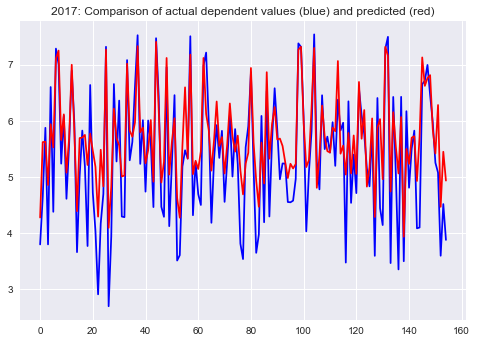

RMSE Test:  0.6561889640782318


In [48]:
# Predicting the 2017 dataset results using the random forest model
y_pred_rfr = rf_regressor.predict(X_2017)

plt.plot(y_2017, color='blue')
plt.plot(y_pred_rfr, color='red')
plt.title('2017: Comparison of actual dependent values (blue) and predicted (red)')
plt.show()

rms_test = sqrt(mean_squared_error(y_2017, y_pred_rfr))
print("RMSE Test: ", rms_test)

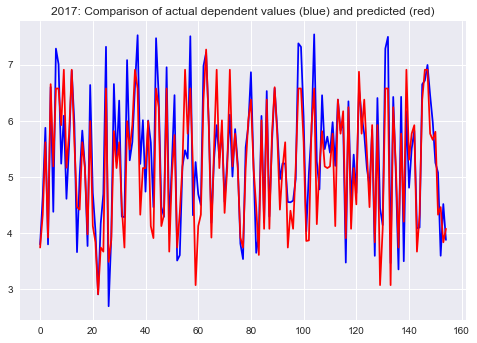

RMSE Test:  0.5652238954625074


In [49]:
# Predicting the 2017 dataset results using the decision tree model
y_pred_dtr = dt_regressor.predict(X_2017)

plt.plot(y_2017, color='blue')
plt.plot(y_pred_dtr, color='red')
plt.title('2017: Comparison of actual dependent values (blue) and predicted (red)')
plt.show()

rms_test = sqrt(mean_squared_error(y_2017, y_pred_dtr))
print("RMSE Test: ", rms_test)

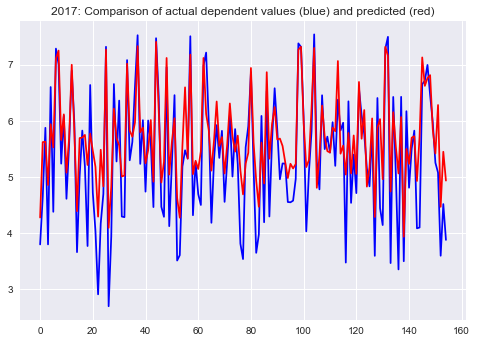

RMSE Test:  3.3736402641627317


In [50]:
# Predicting the 2017 dataset results using the ANN model
y_pred_ann = ann_regressor.predict(X_2017)

plt.plot(y_2017, color='blue')
plt.plot(y_pred_rfr, color='red')
plt.title('2017: Comparison of actual dependent values (blue) and predicted (red)')
plt.show()

rms_test = sqrt(mean_squared_error(y_2017, y_pred_ann))
print("RMSE Test: ", rms_test)

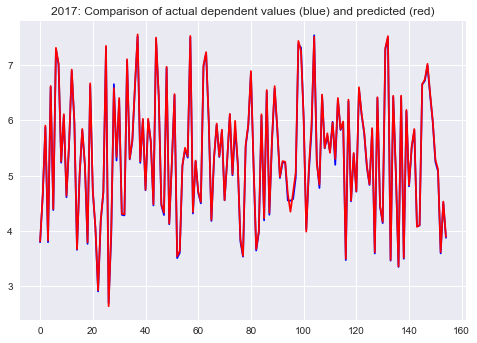

RMSE Test:  0.039115740903808635


In [51]:
# Predicting the 2017 dataset results using the multi linear model
y_pred_mlr = ml_regressor.predict(X_2017)

plt.plot(y_2017, color='blue')
plt.plot(y_pred_mlr, color='red')
plt.title('2017: Comparison of actual dependent values (blue) and predicted (red)')
plt.show()

rms_test = sqrt(mean_squared_error(y_2017, y_pred_mlr))
print("RMSE Test: ", rms_test)

## Conclusion for 2017
The most accurate model that can predict the happiness scores for 2017 is the **Multi Linear Regression** model.

The model used for 2016 and 2017 is not the same and in fact produces accuracy levels which are quite opposite.